<a href="https://colab.research.google.com/github/chavezvicem/skills-introduction-to-github/blob/main/Proyecto_LCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import torch

In [62]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import pipeline
from transformers import BertTokenizer, BertForSequenceClassification


In [44]:
#Descarga de recursos en NTLK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Carga del archivo JSON
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ProyectoLCP/Gift_Cards_reviews.jsonl'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Cargar el archivo y verificar que se legible
df = pd.read_json(file_path, lines=True) #linrs=True se utiliza para leer el archivo jsonl usando la funcion pd.read_json
print(df.head())

   rating               title  \
0       5          Great gift   
1       5    amazon gift card   
2       5        perfect gift   
3       5        Nice looking   
4       1  Not $10 Gift Cards   

                                                text images        asin  \
0                Having Amazon money is always good.     []  B00IX1I3G6   
1  Always the perfect gift.  I have never given o...     []  B005ESMMWW   
2  When you have a person who is hard to shop for...     []  B01K8RIM5Y   
3  The tin is a nice touch and pretty large.  It'...     []  B0091JKVU0   
4  I bought this pack of Starbucks Gift cards in ...     []  B00FTGTM5E   

  parent_asin                       user_id               timestamp  \
0  B00IX1I3G6  AHZ6XMOLEWA67S3TX7IWEXXGWSOA 2019-02-11 06:22:38.332   
1  B005ESMMWW  AFZUK3MTBIBEDQOPAK3OATUOUKLA 2020-09-12 01:45:58.120   
2  B005S28ZES  AFZUK3MTBIBEDQOPAK3OATUOUKLA 2018-09-03 01:58:49.239   
3  B00ADR2LV6  AFZUK3MTBIBEDQOPAK3OATUOUKLA 2014-12-13 02:59:37.00

In [5]:
print("\nInformación del conjunto de datos:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             100 non-null    int64         
 1   title              100 non-null    object        
 2   text               100 non-null    object        
 3   images             100 non-null    object        
 4   asin               100 non-null    object        
 5   parent_asin        100 non-null    object        
 6   user_id            100 non-null    object        
 7   timestamp          100 non-null    datetime64[ns]
 8   helpful_vote       100 non-null    int64         
 9   verified_purchase  100 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 7.3+ KB
None

Estadísticas descriptivas:
           rating                      timestamp  helpful_vote
count  100.000000         

In [6]:
#Revisar valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())


Valores faltantes:
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


In [54]:
def normalizar_texto(texto):
  texto = re.sub(r'[^\w\s]','',texto)
  texto = re.sub(r'\d+','',texto)
  texto = texto.lower()
  return texto

In [50]:
def eliminar_stopwords(tokens, idioma='english'):
  stop_words = set(stopwords.words(idioma))
  return [word for word in tokens if word not in stop_words]

In [55]:

textos = []
with open(file_path, 'r', encoding='utf-8') as archivo:
    for linea in archivo:
      registro = json.loads(linea)
      texto = registro.get("text","")
      texto_limpio = normalizar_texto(texto)
      textos.append(texto_limpio)

print("textos cargados:")
for texto in textos:
  print(texto)

textos cargados:
having amazon money is always good
always the perfect gift  i have never given one and had someone seem or act disappointed  just the opposite  they are thrilled and excited to have a bit of a spree  always the perfect size and color  arrives in  day in most cases  so its never too late  lots of cards to chose from thank you birthday weddingbaby  and many that work for many occasions
when you have a person who is hard to shop for an amazon gift card is p e r f e c t  man or woman  no matter what their hobby lifestyle or age  all you have to do is pick the   dont forget to mention that it is a gift when you check out  you will have some gift card options  ive ordered many of these over years  they are always received with glee  woo hoo  if youre looking for a great fit for me  this is just my size    best to all
the tin is a nice touch and pretty large  its about  in diameter and about  thick  i added a pretty red ribbon and it is perfect  who doesnt love shopping on am

In [56]:
lemmatizer = WordNetLemmatizer()
tokens_limpios = []

In [59]:
for texto in textos:
  tokens = word_tokenize(texto)
  tokens_sin_stopwords = eliminar_stopwords(tokens, idioma='english')
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_sin_stopwords]
  tokens_limpios.append(lemmatized_tokens)

In [60]:
print("\nTokens Lematizados y sin stop words:")
for i, lemmatized in enumerate(tokens_limpios):
  print(f"Texo {i+1}: {tokens}")


Tokens Lematizados y sin stop words:
Texo 1: ['sent', 'in', 'a', 'lovely', 'container']
Texo 2: ['sent', 'in', 'a', 'lovely', 'container']
Texo 3: ['sent', 'in', 'a', 'lovely', 'container']
Texo 4: ['sent', 'in', 'a', 'lovely', 'container']
Texo 5: ['sent', 'in', 'a', 'lovely', 'container']
Texo 6: ['sent', 'in', 'a', 'lovely', 'container']
Texo 7: ['sent', 'in', 'a', 'lovely', 'container']
Texo 8: ['sent', 'in', 'a', 'lovely', 'container']
Texo 9: ['sent', 'in', 'a', 'lovely', 'container']
Texo 10: ['sent', 'in', 'a', 'lovely', 'container']
Texo 11: ['sent', 'in', 'a', 'lovely', 'container']
Texo 12: ['sent', 'in', 'a', 'lovely', 'container']
Texo 13: ['sent', 'in', 'a', 'lovely', 'container']
Texo 14: ['sent', 'in', 'a', 'lovely', 'container']
Texo 15: ['sent', 'in', 'a', 'lovely', 'container']
Texo 16: ['sent', 'in', 'a', 'lovely', 'container']
Texo 17: ['sent', 'in', 'a', 'lovely', 'container']
Texo 18: ['sent', 'in', 'a', 'lovely', 'container']
Texo 19: ['sent', 'in', 'a', 'lovel

In [65]:
#Cargar model, tokenizador y pipline
model = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizador = BertTokenizer.from_pretrained(model)
model = BertForSequenceClassification.from_pretrained(model)
pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizador)

Device set to use cpu


In [68]:
results = pipeline(textos)

In [69]:
for result in results:
  print(f"Texto: {result['label']}")
  print(f"Puntuación: {result['score']:.4f}")

Texto: 5 stars
Puntuación: 0.4886
Texto: 5 stars
Puntuación: 0.8608
Texto: 5 stars
Puntuación: 0.4905
Texto: 5 stars
Puntuación: 0.4660
Texto: 1 star
Puntuación: 0.4575
Texto: 5 stars
Puntuación: 0.6497
Texto: 5 stars
Puntuación: 0.7688
Texto: 5 stars
Puntuación: 0.7180
Texto: 5 stars
Puntuación: 0.6964
Texto: 5 stars
Puntuación: 0.5883
Texto: 5 stars
Puntuación: 0.7330
Texto: 4 stars
Puntuación: 0.3675
Texto: 5 stars
Puntuación: 0.5538
Texto: 5 stars
Puntuación: 0.6816
Texto: 5 stars
Puntuación: 0.5147
Texto: 1 star
Puntuación: 0.7419
Texto: 5 stars
Puntuación: 0.5208
Texto: 4 stars
Puntuación: 0.4325
Texto: 5 stars
Puntuación: 0.8308
Texto: 4 stars
Puntuación: 0.5207
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
Puntuación: 0.5352
Texto: 4 stars
P

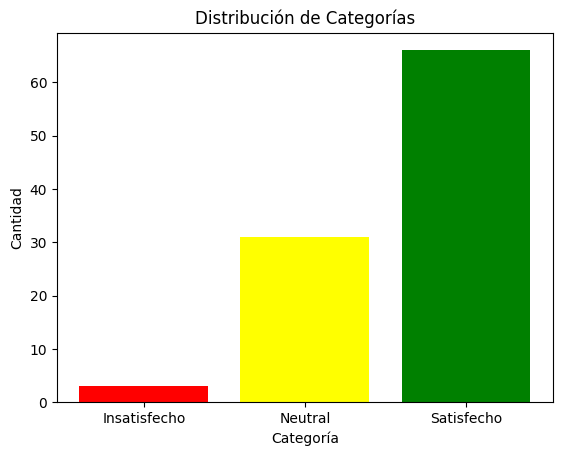

In [70]:
#clasificar los resultados en categorías
Insatisfecho = [res['score'] for res in results if res['score'] <= 0.3]
Neutral = [res['score'] for res in results if 0.3 < res['score'] <= 0.5]
Satisfecho = [res['score'] for res in results if res['score'] > 0.5]

#contar la cantidad de elementos en cada categoría
categorias = ['Insatisfecho', 'Neutral', 'Satisfecho']
cantidades = [len(Insatisfecho), len(Neutral), len(Satisfecho)]

#Crear la gráfica
fig, ax = plt.subplots()
bar_colors = ['red', 'yellow', 'green']
bars = ax.bar(categorias, cantidades, color=bar_colors)
ax.set_xlabel('Categoría')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de Categorías')
plt.show()
